In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 43.5MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout,BatchNormalization
from keras.layers import Flatten
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)


Found 20000 files belonging to 2 classes.


In [ ]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)


In [ ]:
# now we create CNN model


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 70s 112ms/step - loss: 0.1905 - accuracy: 0.9171 - val_loss: 0.5102 - val_accuracy: 0.8278
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1637 - accuracy: 0.9286 - val_loss: 0.7627 - val_accuracy: 0.7882
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1431 - accuracy: 0.9391 - val_loss: 0.7449 - val_accuracy: 0.7866
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1258 - accuracy: 0.9463 - val_loss: 0.6680 - val_accuracy: 0.8278
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1222 - accuracy: 0.9492 - val_loss: 0.7176 - val_accuracy: 0.8378
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1078 - accuracy: 0.9545 - val_loss: 0.6680 - val_accuracy: 0.8120
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1183 - accuracy: 0.9516 - val_loss: 0.6648 - val_ac

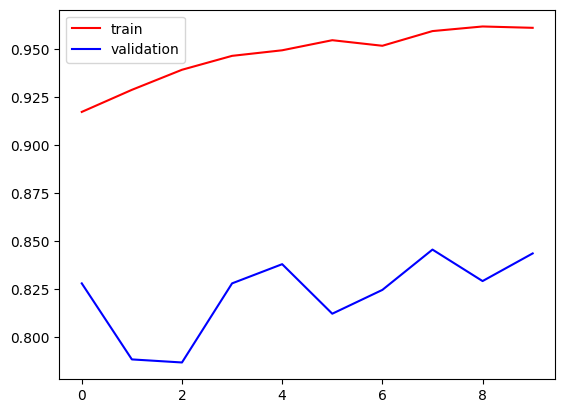

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

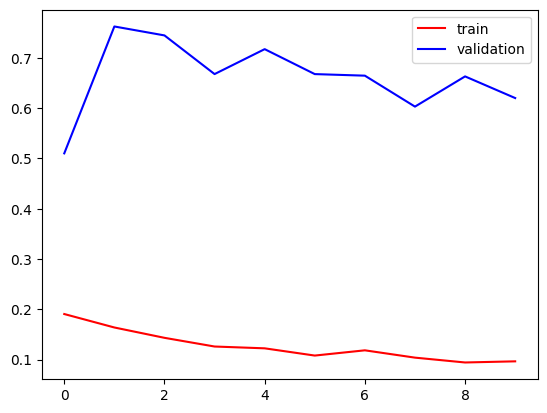

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# there is larg gap bet red and blue,it means it introduce the overfitting

# to reduce overfitting i am using dropout

In [ ]:
# do the prediction

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.jpeg')

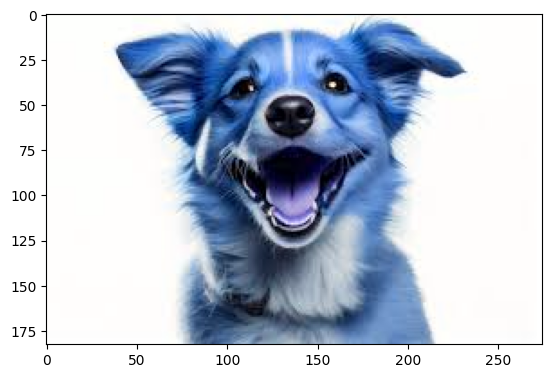

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(183, 275, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
img_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(img_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)